In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
cd C:\Users\anime\OneDrive\Desktop\machine hack dataset

C:\Users\anime\OneDrive\Desktop\machine hack dataset


In [4]:
df = pd.read_csv("train.csv")

In [95]:
df1 = pd.read_csv("test.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [6]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [7]:
df.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [8]:
from scipy.stats import zscore
df.apply(zscore)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,-0.089031,-0.018403,-0.314593,-0.287649,0.538557,-0.703939,-0.227649,-0.624418
1,0.002894,-0.012973,-0.314593,0.062809,0.538557,-0.154287,0.145843,-0.624418
2,-0.092800,-0.015449,-0.314593,-0.331456,-0.639778,0.915144,-0.302803,1.601492
3,-0.105155,0.004597,1.834208,-0.112420,-0.639778,-0.429113,-0.283825,-0.624418
4,-0.176768,-0.023674,-0.314593,-0.638106,-0.050611,-0.154287,-0.582923,-0.624418
...,...,...,...,...,...,...,...,...
209668,0.092934,0.026878,-0.314593,0.588494,1.667795,-0.743769,0.759222,-0.624418
209669,-0.153944,-0.030063,-0.314593,-0.594298,-0.050611,1.548438,-0.328614,1.601492
209670,-0.126094,-0.017844,-0.314593,-0.419070,-0.639778,-0.727837,-0.587477,-0.624418
209671,-0.142846,-0.023115,-0.314593,-0.506684,-0.639778,-0.130389,-0.587477,-0.624418


{'whiskers': [<matplotlib.lines.Line2D at 0x1fe87792fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe8779a580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe87792cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe8779ab20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe8779adf0>],
 'means': []}

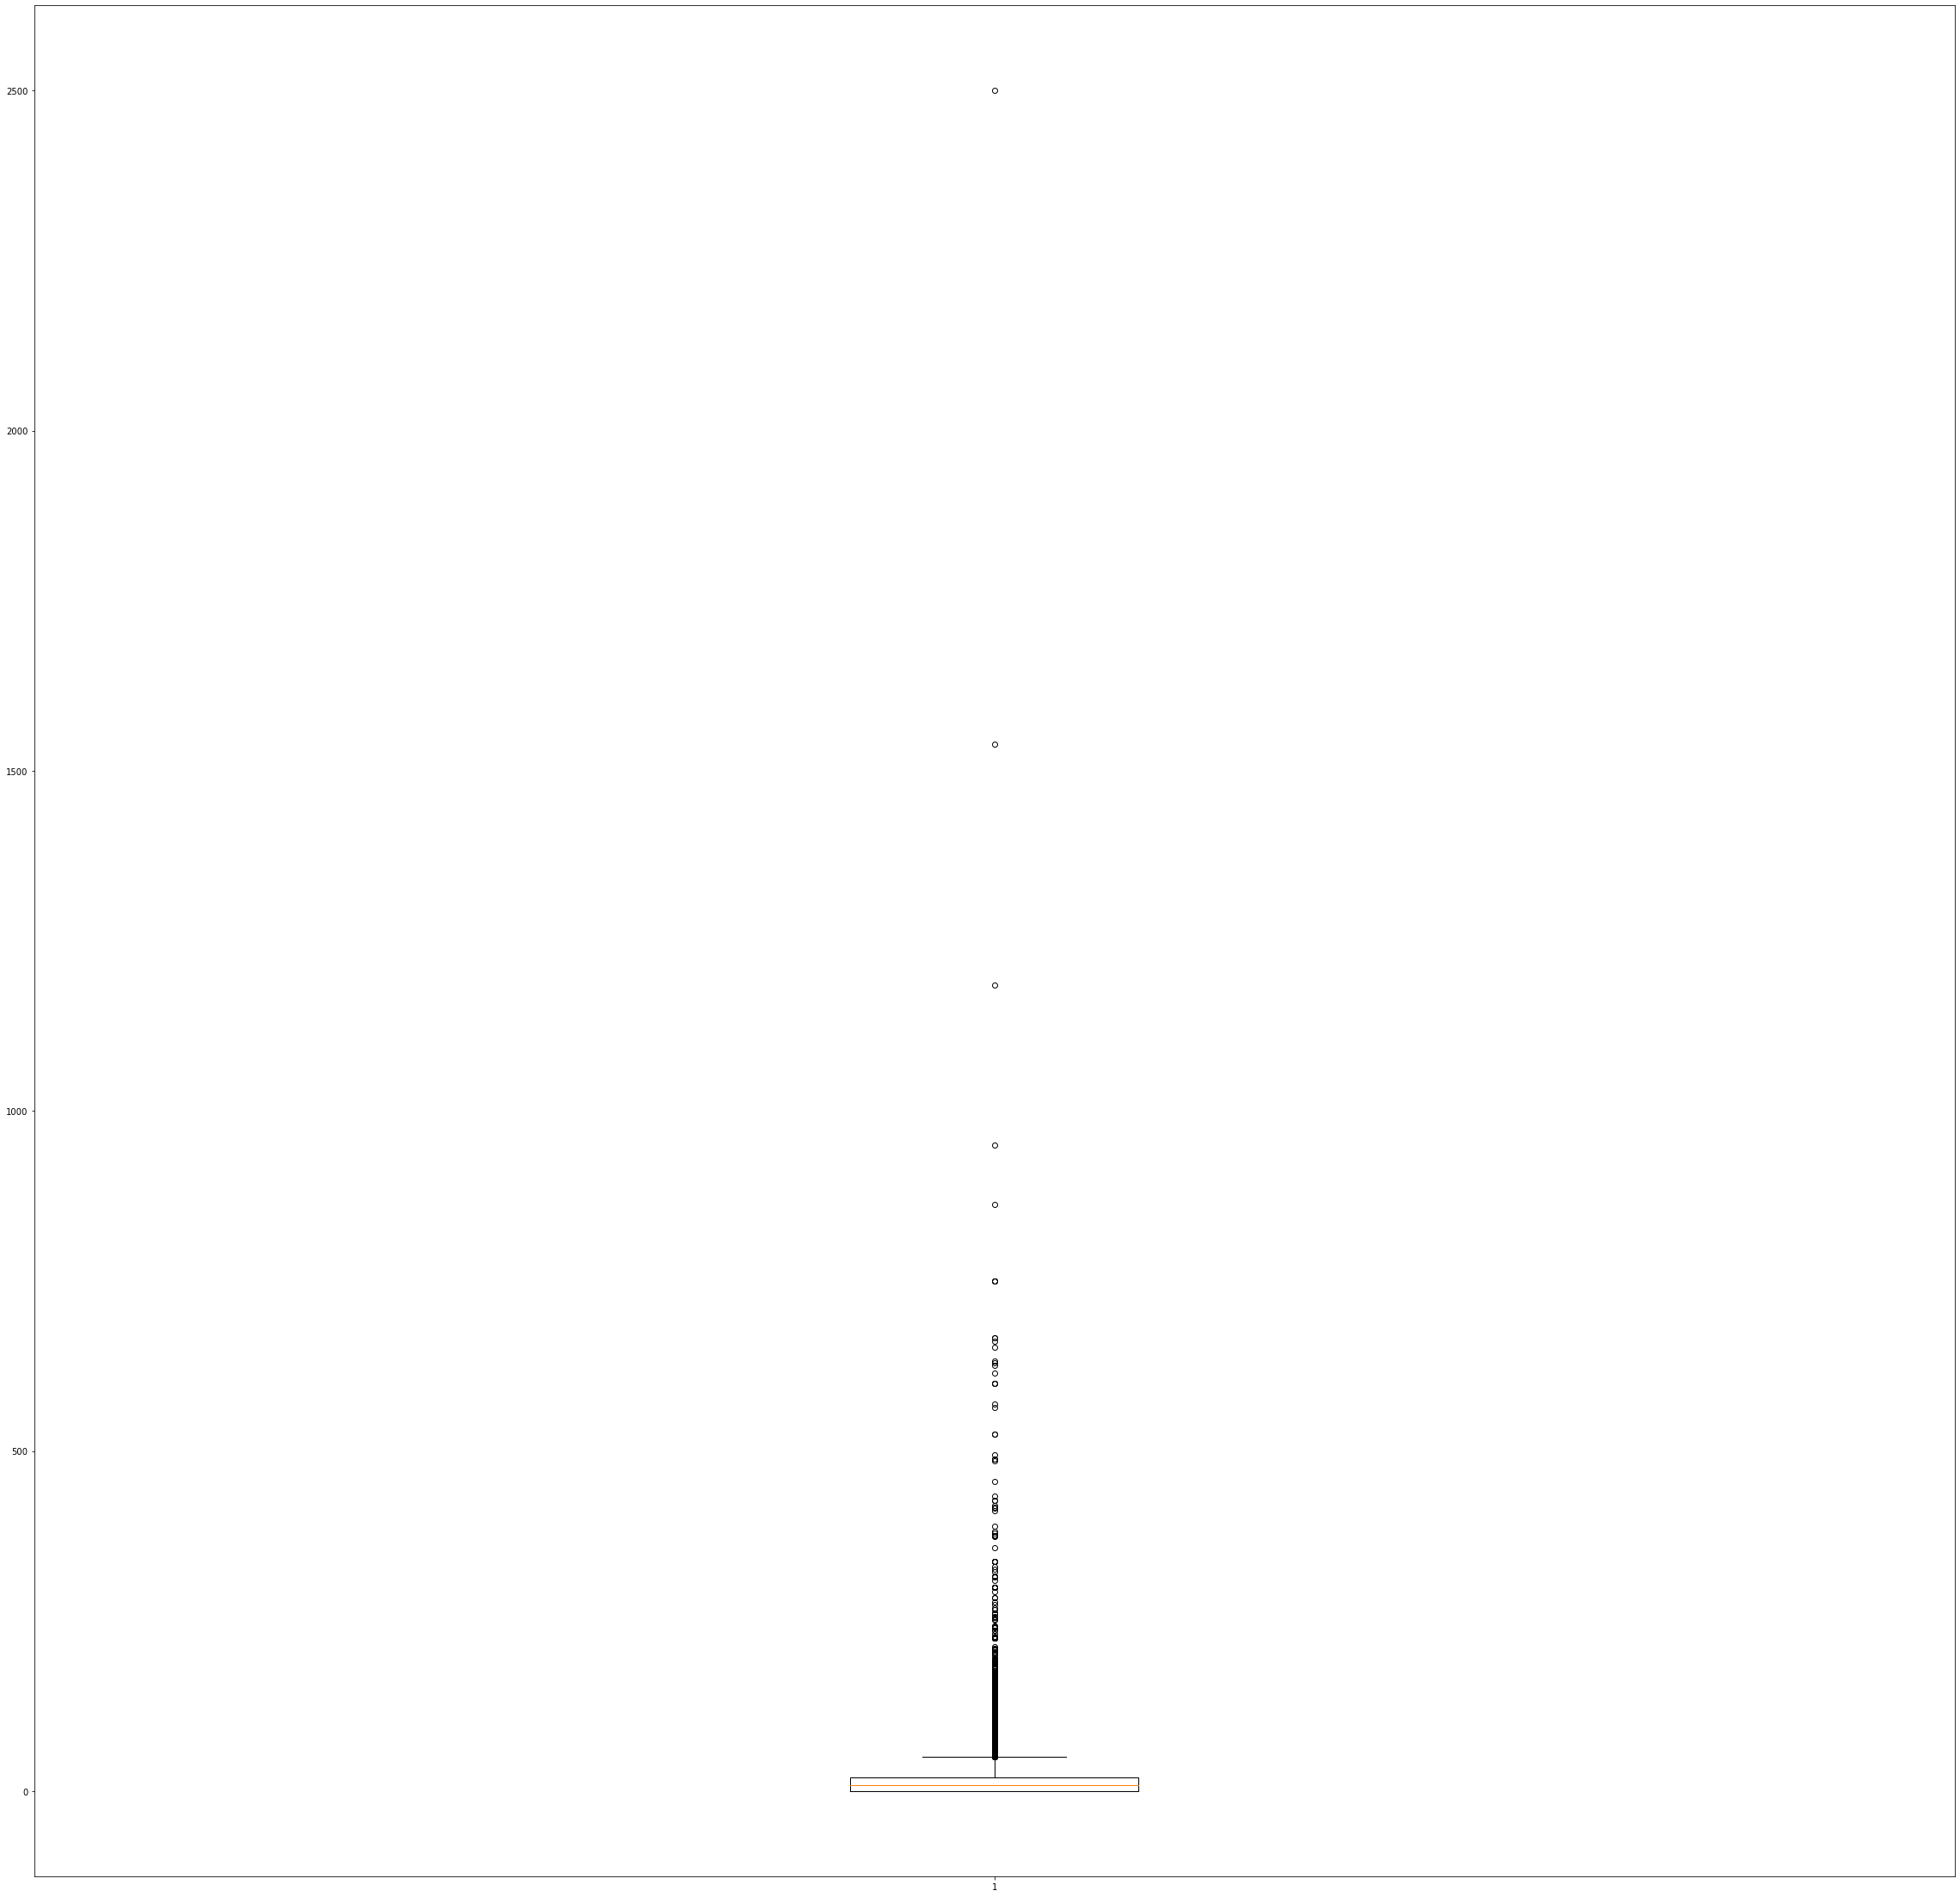

In [11]:
plt.rcParams["figure.figsize"] = [40, 40]
plt.boxplot(df["tip"])

In [12]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [47]:
X = df.drop('total_fare',axis = 1)
y = df.total_fare

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

# Linear 

In [48]:
reg = linear_model.LinearRegression()

In [49]:
reg.fit(X_train, y_train)

LinearRegression()

In [50]:
reg.coef_

array([ 3.03047958e-17, -4.45462375e-16, -2.20986483e-15,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  4.98469286e-15])

In [54]:
res_lin = reg.predict(X_test)

In [55]:
y_test

110587     66.000
43371      51.000
84310     163.500
160055    212.250
172966    126.000
           ...   
64710      76.050
128430     51.000
99429      56.700
109033    135.375
189734    202.950
Name: total_fare, Length: 52419, dtype: float64

In [87]:
error_score1 = metrics.r2_score(y_test, res_lin)
print("R squared error : ", error_score1)

R squared error :  1.0


In [57]:
# df2 = pd.DataFrame(res, columns = ['total_fare'])

In [58]:
# df2.head()

In [59]:
# df2.to_csv('machinehack23.csv')

# XGBoost 

In [60]:
import xgboost as xgb
regressor = xgb.XGBRegressor()

In [61]:
# xgb.XGBRegressor(tree_method='gpu_hist')

In [62]:
# from sklearn.model_selection import GridSearchCV
# # set up our search grid
# param_grid = {"max_depth":    [4, 5, 6],
#               "n_estimators": [500, 600, 700],
#               "learning_rate": [0.01, 0.015]}

# # try out every combination of the above values
# search = GridSearchCV(regressor, param_grid, cv=5).fit(X, y)

# print("The best hyperparameters are ",search.best_params_)

In [63]:
# X = df.drop('total_fare',axis = 1)
# y = df.total_fare

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

In [64]:
# regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
#                            n_estimators  = search.best_params_["n_estimators"],
#                            max_depth     = search.best_params_["max_depth"],
#                            eval_metric='rmsle')

regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [65]:
predictions = regressor.predict(X_test)

In [88]:
error_score2 = metrics.r2_score(y_test, predictions)
print("R squared error : ", error_score2)

R squared error :  0.9973415109280527


In [67]:
# df2 = pd.DataFrame(predictions, columns = ['total_fare'])

In [68]:
# df2.to_csv('machinehack23xgbnew2.csv')

# Lasso

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [70]:
lass_reg_model = Lasso()

In [71]:
lass_reg_model.fit(X_train,y_train)

Lasso()

In [72]:
lasso_pred = lass_reg_model.predict(X_test)

In [89]:
error_score3 = metrics.r2_score(y_test, lasso_pred)
print("R squared error : ", error_score3)

R squared error :  0.9999992598266165


In [74]:
# df2 = pd.DataFrame(lasso_pred, columns = ['total_fare'])

In [75]:
# df2.to_csv('machinehack23lasso.csv')

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)

In [77]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
preds = regressor.predict(X_test)

In [79]:
# df2 = pd.DataFrame(preds, columns = ['total_fare'])

In [80]:
# df2.to_csv('machinehack23randomforest.csv')

In [90]:
error_score4 = metrics.r2_score(y_test, preds)
print("R squared error : ", error_score4)

R squared error :  0.9958592281546719


# Comparison

In [94]:
print('linear:  '+ str(error_score1))
print('xgboost:  '+ str(error_score2))
print('lasso:  '+ str(error_score3))
print('random_forest:  '+ str(error_score4))

linear:  1.0
xgboost:  0.9973415109280527
lasso:  0.9999992598266165
random_forest:  0.9958592281546719


### Saving the Best Model

In [ ]:
# df2 = pd.DataFrame(lasso_pred, columns = ['total_fare'])
# df2.to_csv('machinehack23lasso.csv')